In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
df=pd.read_csv('Data/Real-Data/Real_Combine.csv')

In [3]:
df.head()

T    TM   Tm     SLP     H   VV    V    VM      PM 2.5
0   7.4   9.8  4.8  1017.6  93.0  0.5  4.3   9.4  219.720833
1   7.8  12.7  4.4  1018.5  87.0  0.6  4.4  11.1  182.187500
2   6.7  13.4  2.4  1019.4  82.0  0.6  4.8  11.1  154.037500
3   8.6  15.5  3.3  1018.7  72.0  0.8  8.1  20.6  223.208333
4  12.4  20.9  4.4  1017.3  61.0  1.3  8.7  22.2  200.645833

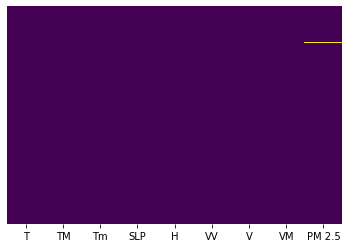

In [4]:
## Check for null values

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
df=df.dropna()

In [6]:
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

In [7]:
## check null values
X.isnull()

T     TM     Tm    SLP      H     VV      V     VM
0     False  False  False  False  False  False  False  False
1     False  False  False  False  False  False  False  False
2     False  False  False  False  False  False  False  False
3     False  False  False  False  False  False  False  False
4     False  False  False  False  False  False  False  False
5     False  False  False  False  False  False  False  False
6     False  False  False  False  False  False  False  False
7     False  False  False  False  False  False  False  False
8     False  False  False  False  False  False  False  False
9     False  False  False  False  False  False  False  False
10    False  False  False  False  False  False  False  False
11    False  False  False  False  False  False  False  False
12    False  False  False  False  False  False  False  False
13    False  False  False  False  False  False  False  False
14    False  False  False  False  False  False  False  False
15    False  False  False  False  False  False  False  False
16    False  False  False  False  False  False  False  False
17    False  False  False  False  False  False  False  False
18    False  False  False  False  False  False  False  False
19    False  False  False  False  False  False  False  False
20    False  False  False  False  False  False  False  False
21    False  False  False  False  False  False  False  False
22    False  False  False  False  False  False  False  False
23    False  False  False  False  False  False  False  False
24    False  False  False  False  False  False  False  False
25    False  False  False  False  False  False  False  False
26    False  False  False  False  False  False  False  False
27    False  False  False  False  False  False  False  False
28    False  False  False  False  False  False  False  False
29    False  False  False  False  False  False  False  False
...     ...    ...    ...    ...    ...    ...    ...    ...
1063  False  False  False  False  False  False  False  False
1064  False  False  False  False  False  False  False  False
1065  False  False  False  False  False  False  False  False
1066  False  False  False  False  False  False  False  False
1067  False  False  False  False  False  False  False  False
1068  False  False  False  False  False  False  False  False
1069  False  False  False  False  False  False  False  False
1070  False  False  False  False  False  False  False  False
1071  False  False  False  False  False  False  False  False
1072  False  False  False  False  False  False  False  False
1073  False  False  False  False  False  False  False  False
1074  False  False  False  False  False  False  False  False
1075  False  False  False  False  False  False  False  False
1076  False  False  False  False  False  False  False  False
1077  False  False  False  False  False  False  False  False
1078  False  False  False  False  False  False  False  False
1079  False  False  False  False  False  False  False  False
1080  False  False  False  False  False  False  False  False
1081  False  False  False  False  False  False  False  False
1082  False  False  False  False  False  False  False  False
1083  False  False  False  False  False  False  False  False
1084  False  False  False  False  False  False  False  False
1085  False  False  False  False  False  False  False  False
1086  False  False  False  False  False  False  False  False
1087  False  False  False  False  False  False  False  False
1088  False  False  False  False  False  False  False  False
1089  False  False  False  False  False  False  False  False
1090  False  False  False  False  False  False  False  False
1091  False  False  False  False  False  False  False  False
1092  False  False  False  False  False  False  False  False

[1092 rows x 8 columns]

In [8]:
y.isnull()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1063    False
1064    False
1065    False
1066    False
1067    False
1068    False
1069    False
1070    False
1071    False
1072    False
1073    False
1074    False
1075    False
1076    False
1077    False
1078    False
1079    False
1080    False
1081    False
1082    False
1083    False
1084    False
1085    False
1086    False
1087    False
1088    False
1089    False
1090    False
1091    False
1092    False
Name: PM 2.5, Length: 1092, dtype: bool

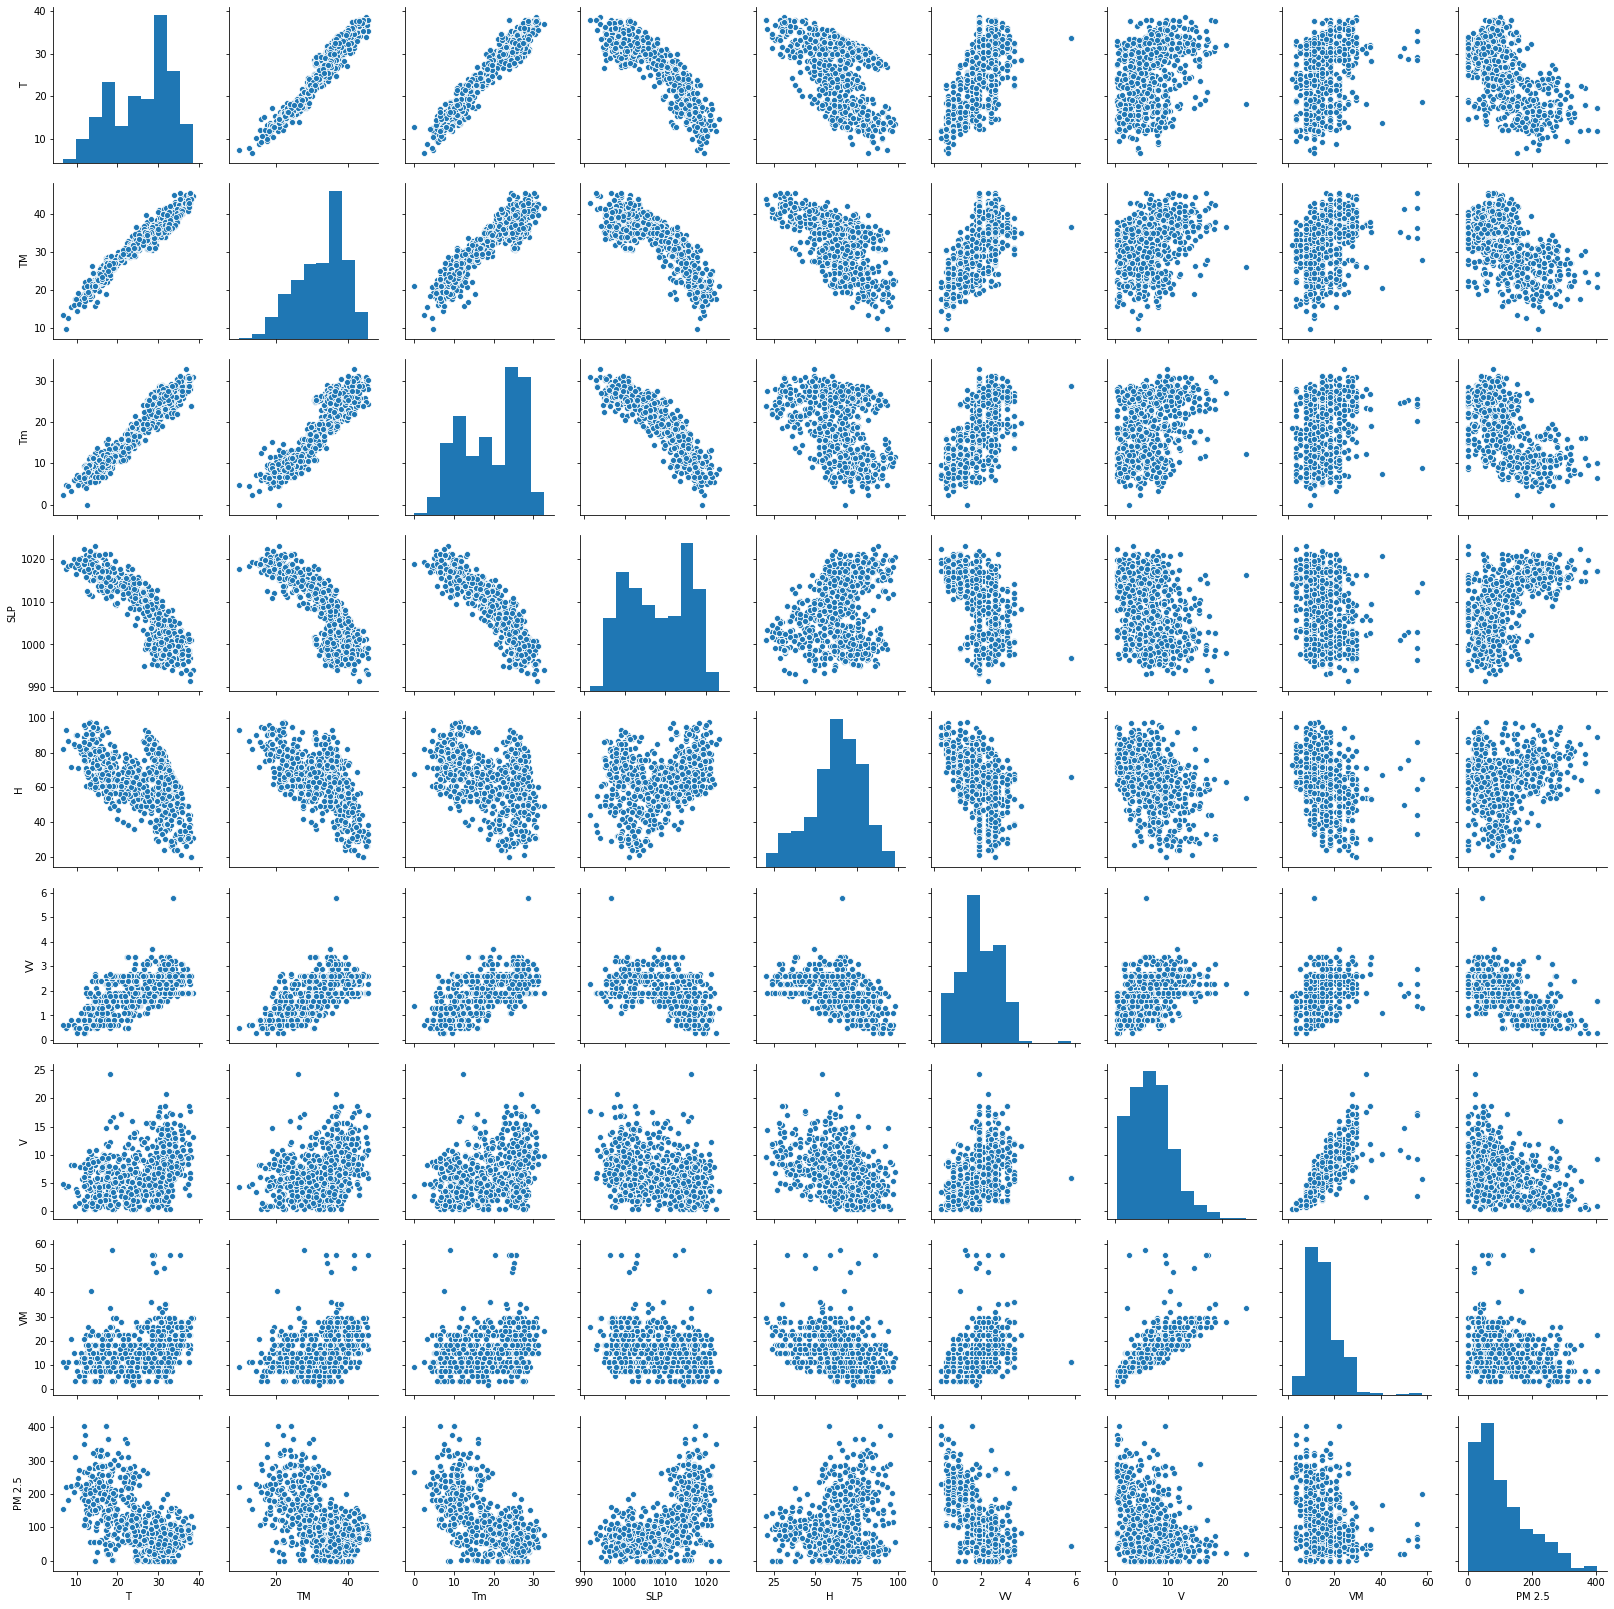

In [9]:
sns.pairplot(df)

In [9]:
df.corr()

T        TM        Tm       SLP         H        VV         V  \
T       1.000000  0.967536  0.953719 -0.881409 -0.509299  0.640792  0.301994   
TM      0.967536  1.000000  0.892031 -0.822958 -0.586681  0.606945  0.292949   
Tm      0.953719  0.892031  1.000000 -0.917518 -0.287357  0.577240  0.296225   
SLP    -0.881409 -0.822958 -0.917518  1.000000  0.240256 -0.517915 -0.329838   
H      -0.509299 -0.586681 -0.287357  0.240256  1.000000 -0.465374 -0.380575   
VV      0.640792  0.606945  0.577240 -0.517915 -0.465374  1.000000  0.376873   
V       0.301994  0.292949  0.296225 -0.329838 -0.380575  0.376873  1.000000   
VM      0.287738  0.297011  0.266782 -0.310704 -0.362177  0.342442  0.775655   
PM 2.5 -0.631462 -0.568409 -0.673824  0.623187  0.138005 -0.573941 -0.268530   

              VM    PM 2.5  
T       0.287738 -0.631462  
TM      0.297011 -0.568409  
Tm      0.266782 -0.673824  
SLP    -0.310704  0.623187  
H      -0.362177  0.138005  
VV      0.342442 -0.573941  
V       0.775655 -0.268530  
VM      1.000000 -0.215854  
PM 2.5 -0.215854  1.000000

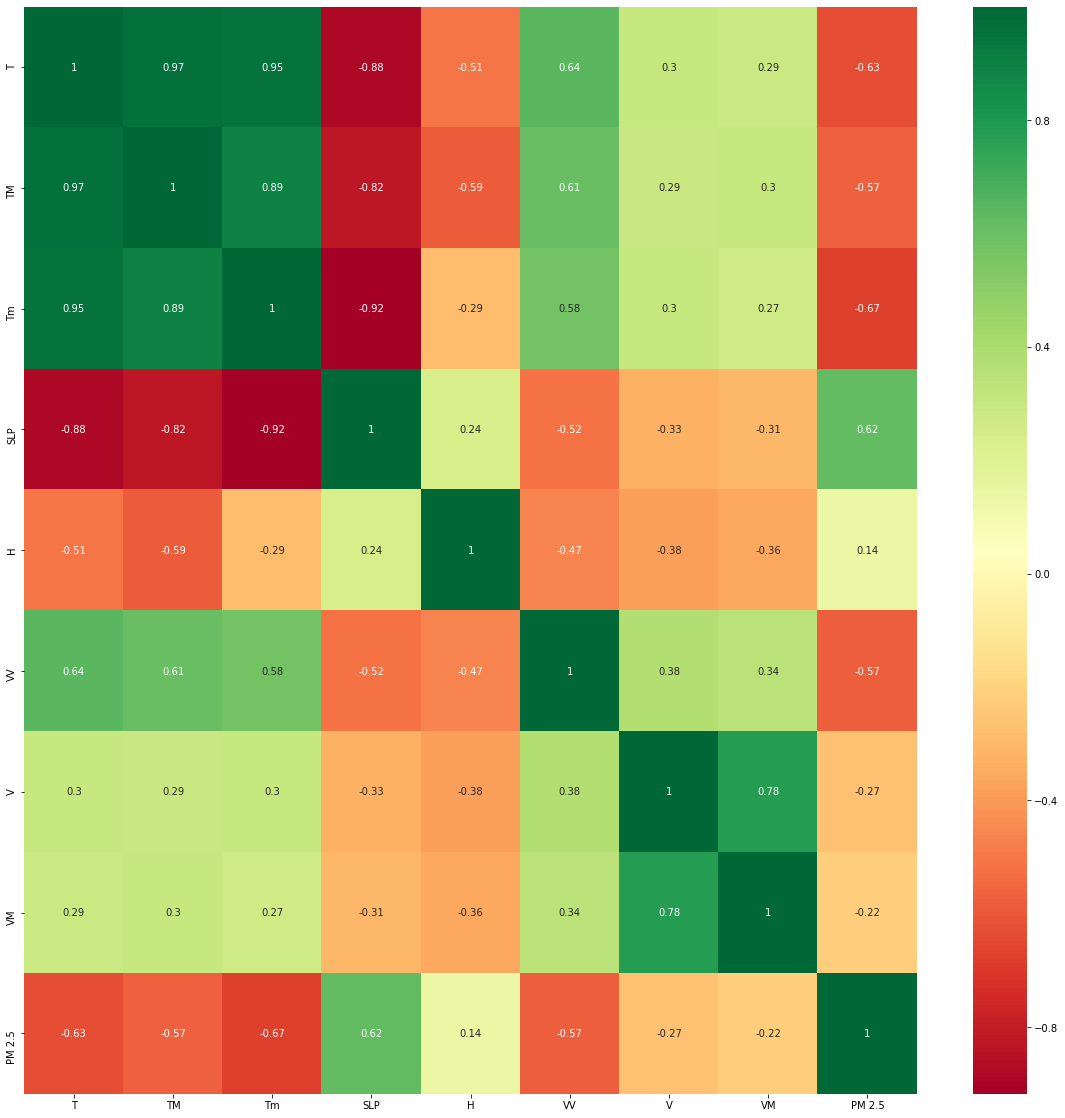

In [10]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [11]:
corrmat.index

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

In [12]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

C:\Users\affif\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [13]:
X.head()

T    TM   Tm     SLP     H   VV    V    VM
0   7.4   9.8  4.8  1017.6  93.0  0.5  4.3   9.4
1   7.8  12.7  4.4  1018.5  87.0  0.6  4.4  11.1
2   6.7  13.4  2.4  1019.4  82.0  0.6  4.8  11.1
3   8.6  15.5  3.3  1018.7  72.0  0.8  8.1  20.6
4  12.4  20.9  4.4  1017.3  61.0  1.3  8.7  22.2

In [14]:
print(model.feature_importances_)

[0.15962241 0.04891071 0.23583207 0.18040231 0.08184654 0.19711686
 0.05814038 0.03812873]


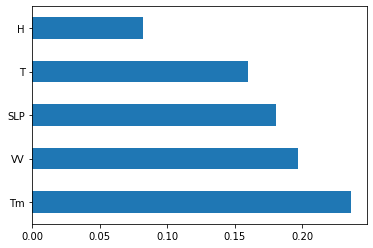

In [15]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

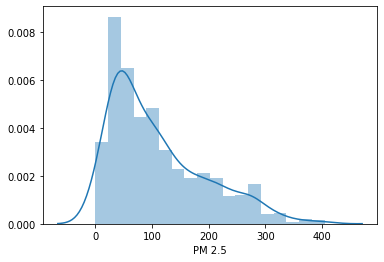

In [16]:
sns.distplot(y)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [18]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(criterion = 'mse')
dtree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [19]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtree.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 1.0


In [20]:
print("Coefficient of determination R^2 <-- on test set: {}".format(dtree.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.668226572077222


In [21]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(dtree, X, y, cv = 5)

In [22]:
score.mean()

0.49174369429809267

In [90]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

In [91]:
features = list(df.columns[: -1])
features

['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM']

In [92]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [34]:
dot_data = StringIO()
export_graphviz(dtree, out_file = dot_data, feature_names = features, rounded = True, filled = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.935398 to fit



# Model Evaluation

In [23]:
prediction = dtree.predict(X_test)

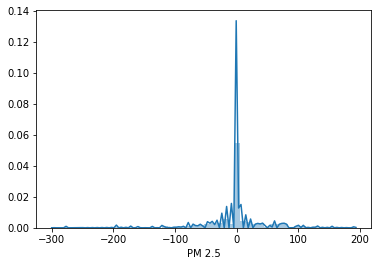

In [24]:
sns.distplot(y_test-prediction)

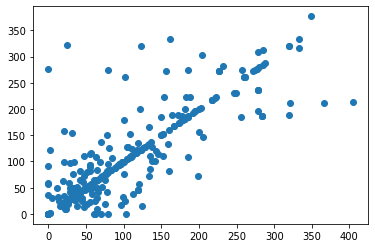

In [25]:
plt.scatter(y_test, prediction)

# HyperParameter Tuning Decision Tree Regressor

In [96]:
DecisionTreeRegressor()

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [97]:
## Hyper Parameter Optimization

params={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
    
}

In [98]:
## Hyperparameter optimization using GridSearchCV
from sklearn.model_selection import GridSearchCV

In [99]:
random_search=GridSearchCV(dtree,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)

In [100]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [101]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 1909 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 6069 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 11893 tasks      | elapsed:   42.2s
[Parallel(n_jobs=-1)]: Done 19381 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 28533 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 39349 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 51829 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 65973 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 81781 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 99253 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 102400 out of 102400 | elapsed:  5.5min finished



 Time taken: 0 hours 5 minutes and 34.2 seconds.


C:\Users\affif\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [102]:
random_search.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': 30,
 'min_samples_leaf': 2,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [103]:
random_search.best_score_

-3132.09677598143

In [104]:
predictions=random_search.predict(X_test)

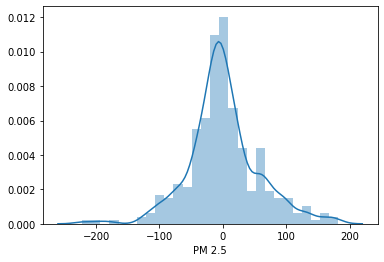

In [105]:
sns.distplot(y_test-predictions)

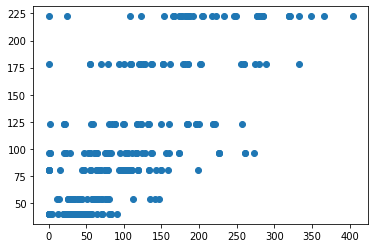

In [106]:
plt.scatter(y_test, predictions)

In [26]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_train)))

NameError: name 'predictions' is not defined

In [28]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 24.650940040650408
MSE: 2376.7589439363146
RMSE: 48.752014767969484


In [111]:
print("Coefficient of determination R^2 <-- on test set: {}".format(random_search.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: -3171.808145980198
